<h1><center>HW 3: Build Twitter Networks</center></h1>

### Q1. Scrape the follower-followee network by companies.
    * Define a function to retrieve the follower-followee network of a list of twenty accounts of U.S. FT companies. 
    * The input will be a list of Twitter screen names. 
    * The output will be a dataframe with this list of accounts as row index and column index, and 1 and 0 as values.
    * Note: this will take some time because Twitter API will force you to sleep. 


In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tweepy
import datetime
import time


In [8]:
CONSUMER_KEY="gTS2XqDXMsPpaq5xZnRMQWDm9"
CONSUMER_SECRET="rZzIZw0yfJFq9MGb71Z1KDoj1lyLD8pNBnqPTIr2XrZh8inyX3"
ACCESS_KEY="1577082238738599936-0PKimRl4ys1ORK6WYdtzpOSGBJ3IVC"
ACCESS_SECRET="yX4JOTFY2GYgPCm4UHp1MKfU3juJ6Fl1pTaMBop1VboMn"

accounts=['ebay','tesla','amazon','bestbuy','homedepot','hulu','espn','walmart','google','intuit','intel','paypal','oracle','netflix','target','lowes','apple','ibm','twitter','waltdisneyco']
tb = pd.DataFrame(columns = accounts, index = accounts)


def get_follow(accounts):
  auth=tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
  auth.set_access_token(ACCESS_KEY,ACCESS_SECRET)
  api=tweepy.API(auth, wait_on_rate_limit=True)
  for x in accounts:
    for y in accounts:
      following = api.get_friendship(source_screen_name = x, target_screen_name = y)
      friend = following[1].following
      tb.loc[x,y] = friend  
    
  return tb

In [9]:
accounts=['ebay','tesla','amazon','bestbuy','homedepot','hulu','espn','walmart','google','intuit','intel','paypal','oracle','netflix','target','lowes','apple','ibm','twitter','waltdisneyco']

get_follow(accounts)

Rate limit reached. Sleeping for: 869
Rate limit reached. Sleeping for: 870


,ebay,tesla,amazon,bestbuy,homedepot,hulu,espn,walmart,google,intuit,intel,paypal,oracle,netflix,target,lowes,apple,ibm,twitter,waltdisneyco
ebay,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
tesla,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
amazon,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
bestbuy,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
homedepot,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
hulu,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
espn,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
walmart,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
google,True,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False
intuit,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [ ]:
tb

In [10]:
df = tb.astype(int)
df

,ebay,tesla,amazon,bestbuy,homedepot,hulu,espn,walmart,google,intuit,intel,paypal,oracle,netflix,target,lowes,apple,ibm,twitter,waltdisneyco
ebay,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
tesla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
amazon,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
bestbuy,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
homedepot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hulu,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
espn,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
walmart,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
google,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
intuit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Q2. Build a directed network with the data you just scraped.
    * Bulid a network and visualize it. Hint: you can use "nx.convert_matrix.from_pandas_adjacency".
    * Calculate the **degree centrality**. 
    * Sort these nodes by degree centrality and print the top two account.

In [40]:
#df1=df.read_csv("tb.csv",header=0,index_col=0)
!pip install --upgrade scipy
!pip install --upgrade networkx
import networkx as nx
import scipy
print(scipy.__version__)
print(nx.__version__)

1.9.3
2.8.7


37
20
[[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0

/var/folders/p8/8x8vy4td72vfml9k9swgv8m80000gn/T/ipykernel_6787/491424614.py:15: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  print(nx.incidence_matrix(B).todense())


<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'The follower-followee network of Fortune companies')

(-1.17310434863479, 0.821717192775649, -1.12253335947525, 0.8493896575934676)

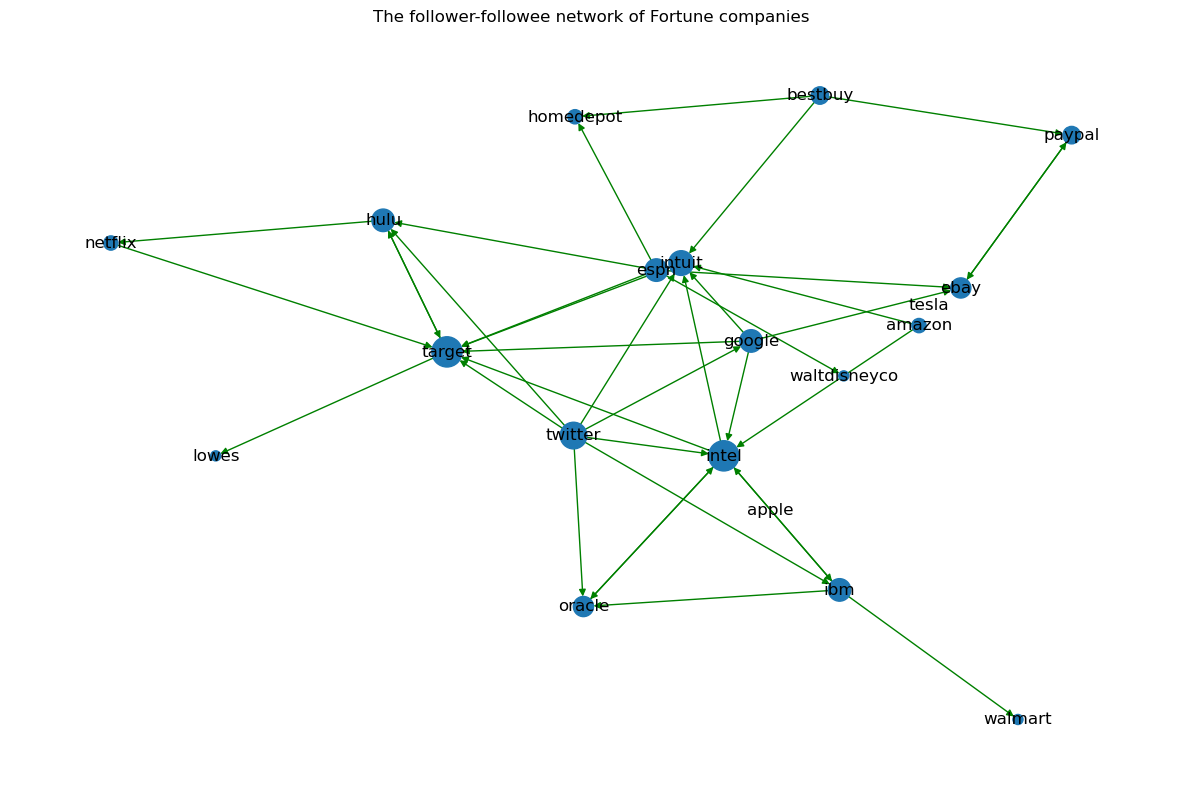

In [14]:
# Build a network from the adjacency matrix


A = nx.DiGraph()
B = nx.is_directed(A)
B = nx.convert_matrix.from_pandas_adjacency(df, create_using=A)

no_edges = B.number_of_edges()
no_nodes = B.number_of_nodes()
print(no_edges)
print(no_nodes)


# Visualize
print(nx.incidence_matrix(B).todense())
figure(figsize=(15, 10), dpi=100)


# node size proportional to degree
node_size = [x * 1000 for x in nx.degree_centrality(B).values()]



# choose a layout function
pos=nx.kamada_kawai_layout(B)


# edge color
edge_color="green"


# make arrows more obvious
arrowsize=10

nx.drawing.nx_pylab.draw_networkx(B,node_size=node_size, pos=pos, arrowsize=arrowsize, edge_color=edge_color,
                                  with_labels=True)

plt.title('The follower-followee network of Fortune companies')
plt.axis("off") 
plt.show()

In [25]:
import math

# calculate centrality 
c = nx.degree_centrality(B)
print("Degree Centrality: \n",c)

# sort


sort_centrality = {}
sorted_keys = sorted(c, key=c.get, reverse=True)  

for a in sorted_keys:
    sort_centrality[a] = c[a]
print("\nSorted centrality: \n",sort_centrality)





Degree Centrality: 
 {'ebay': 0.21052631578947367, 'tesla': 0.0, 'amazon': 0.10526315789473684, 'bestbuy': 0.15789473684210525, 'homedepot': 0.10526315789473684, 'hulu': 0.2631578947368421, 'espn': 0.2631578947368421, 'walmart': 0.05263157894736842, 'google': 0.2631578947368421, 'intuit': 0.3157894736842105, 'intel': 0.47368421052631576, 'paypal': 0.15789473684210525, 'oracle': 0.21052631578947367, 'netflix': 0.10526315789473684, 'target': 0.47368421052631576, 'lowes': 0.05263157894736842, 'apple': 0.0, 'ibm': 0.2631578947368421, 'twitter': 0.3684210526315789, 'waltdisneyco': 0.05263157894736842}

Sorted centrality: 
 {'intel': 0.47368421052631576, 'target': 0.47368421052631576, 'twitter': 0.3684210526315789, 'intuit': 0.3157894736842105, 'hulu': 0.2631578947368421, 'espn': 0.2631578947368421, 'google': 0.2631578947368421, 'ibm': 0.2631578947368421, 'ebay': 0.21052631578947367, 'oracle': 0.21052631578947367, 'bestbuy': 0.15789473684210525, 'paypal': 0.15789473684210525, 'amazon': 0.105

In [26]:
degree_top1 = list(sort_centrality.keys())[0]
degree_top2 = list(sort_centrality.keys())[1]

print(degree_top1)
print(degree_top2)



intel
target


## Q3 scrape tweets
 * Define a functionn to scrape the most recent (e.g. make a 200 call) **original** (exclude retweets) tweets from multiple accouts.
 * For each tweet, grab "id","created_at","full_text","user.screen_name".
 * Make a dataframe and return the dataframe.
 * Use the function to get the original tweets of the top twp accounts from Q2. 


In [41]:
!pip install --upgrade tweepy


     |████████████████████████████████| 101 kB 5.4 MB/s ta 0:00:01
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.10.1
    Uninstalling tweepy-4.10.1:
      Successfully uninstalled tweepy-4.10.1


In [52]:
CONSUMER_KEY="gTS2XqDXMsPpaq5xZnRMQWDm9"
CONSUMER_SECRET="rZzIZw0yfJFq9MGb71Z1KDoj1lyLD8pNBnqPTIr2XrZh8inyX3"
ACCESS_KEY="1577082238738599936-0PKimRl4ys1ORK6WYdtzpOSGBJ3IVC"
ACCESS_SECRET="yX4JOTFY2GYgPCm4UHp1MKfU3juJ6Fl1pTaMBop1VboMn"

auth=tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY,ACCESS_SECRET)
api=tweepy.API(auth)



def get_all_tweets(user_names):
    
    alltweets=[]
    for user_name in user_names:
        
        new_tweets=api.user_timeline(screen_name=user_name, count=200)
  
        alltweets.extend(new_tweets)
    
    
    outtweets = [[tweet.id_str, tweet.user.name, tweet.created_at, 
                  tweet.text.encode("utf-8")] for tweet in alltweets]
    
    

    dfnew = pd.DataFrame (outtweets, columns = ["id","user_name","created_at","text"])
    
    print(dfnew)

if __name__ == '__main__':
    get_all_tweets([degree_top1,degree_top2])



    



                      id user_name                created_at  \
0    1586120213166276613     Intel 2022-10-28 22:18:22+00:00   
1    1586120213161992194     Intel 2022-10-28 22:18:22+00:00   
2    1586120213069692930     Intel 2022-10-28 22:18:22+00:00   
3    1586120213065596928     Intel 2022-10-28 22:18:22+00:00   
4    1586120213057110021     Intel 2022-10-28 22:18:22+00:00   
..                   ...       ...                       ...   
395  1580579833939398657    Target 2022-10-13 15:22:52+00:00   
396  1580576796546068481    Target 2022-10-13 15:10:48+00:00   
397  1580576123054096384    Target 2022-10-13 15:08:08+00:00   
398  1580408180638683136    Target 2022-10-13 04:00:47+00:00   
399  1580328707763630080    Target 2022-10-12 22:44:59+00:00   

                                                  text  
0    b"@JohnNosta @ChefGruel @ChefCCShelton It's ev...  
1    b'@alexa99 You look like a star, Alexa! \xe2\x...  
2    b'@pizzahut Finding a wafer where pizza should...  
3  